In [1]:
import os
import numpy as np
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt

In [2]:
# Define paths
train_dir = '/kaggle/input/mrl-eye-dataset/data/train'
val_dir = '/kaggle/input/mrl-eye-dataset/data/val'
test_dir = '/kaggle/input/mrl-eye-dataset/data/test'

In [3]:
# Data transformations for augmentation and preprocessing
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomApply([transforms.RandomAffine(20, shear=10, scale=(0.8, 1.2))], p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(val_dir, transform=val_test_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=val_test_transforms)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Print the class mappings
#print("Class mappings:", train_dataset.classes)

# Output dataset information
print(f"Found {len(train_dataset)} images belonging to {len(train_dataset.classes)} classes.")
print(f"Found {len(val_dataset)} images belonging to {len(val_dataset.classes)} classes.")
print(f"Found {len(test_dataset)} images belonging to {len(test_dataset.classes)} classes.")

Found 50937 images belonging to 2 classes.
Found 16980 images belonging to 2 classes.
Found 16981 images belonging to 2 classes.


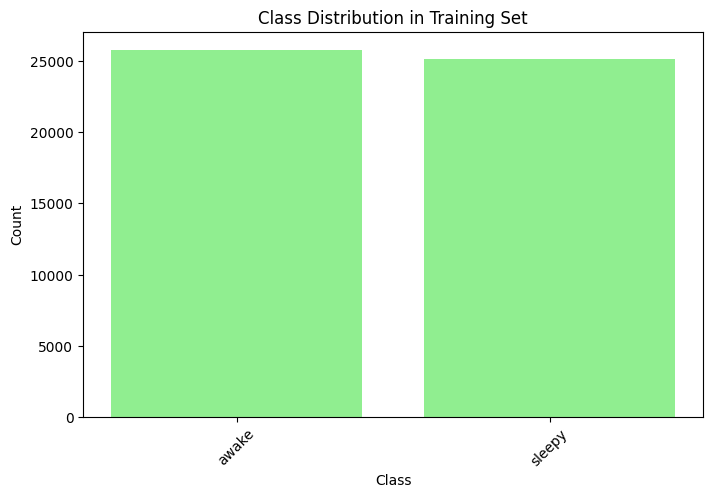

In [4]:
from collections import Counter

# Get class distribution for the training set
train_class_counts = Counter([label for _, label in train_dataset])

# Map class indices to their corresponding class names
class_names = train_dataset.classes
train_class_distribution = {class_names[k]: v for k, v in train_class_counts.items()}

# Plot the class distribution
plt.figure(figsize=(8, 5))
plt.bar(train_class_distribution.keys(), train_class_distribution.values(), color='lightgreen')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Training Set')
plt.xticks(rotation=45)
plt.show()


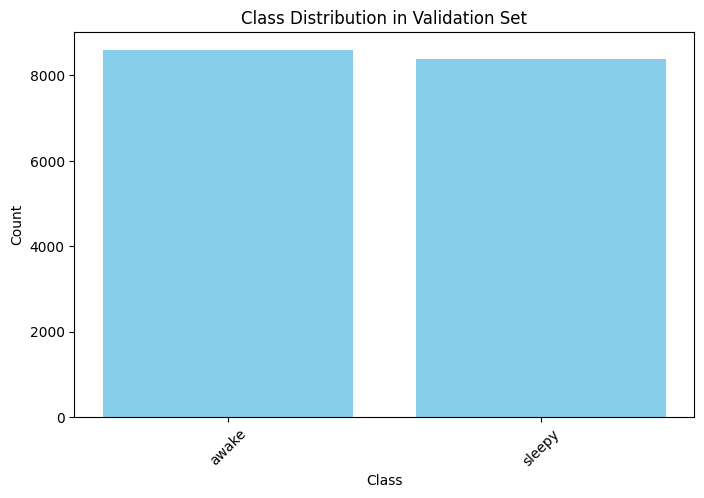

In [5]:
from collections import Counter

# Get class distribution for the validation set
val_class_counts = Counter([label for _, label in val_dataset])

# Map class indices to their corresponding class names
class_names = val_dataset.classes
val_class_distribution = {class_names[k]: v for k, v in val_class_counts.items()}

# Plot the class distribution
plt.figure(figsize=(8, 5))
plt.bar(val_class_distribution.keys(), val_class_distribution.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Validation Set')
plt.xticks(rotation=45)
plt.show()


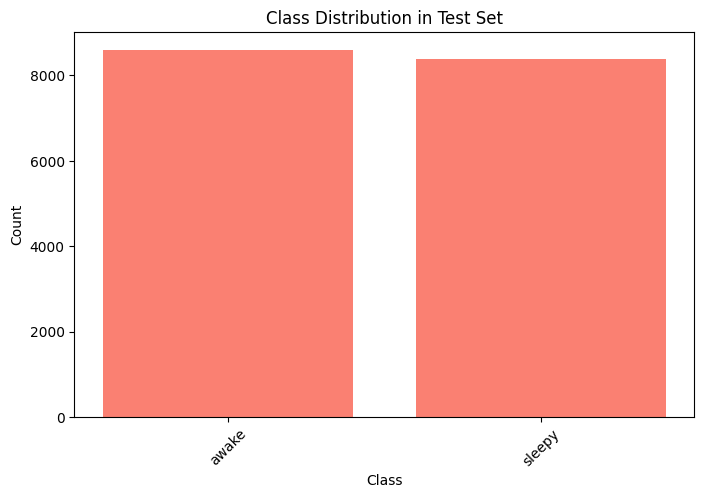

In [6]:
from collections import Counter

# Get class distribution for the test set
test_class_counts = Counter([label for _, label in test_dataset])

# Map class indices to their corresponding class names
class_names = test_dataset.classes
test_class_distribution = {class_names[k]: v for k, v in test_class_counts.items()}

# Plot the class distribution
plt.figure(figsize=(8, 5))
plt.bar(test_class_distribution.keys(), test_class_distribution.values(), color='salmon')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Test Set')
plt.xticks(rotation=45)
plt.show()


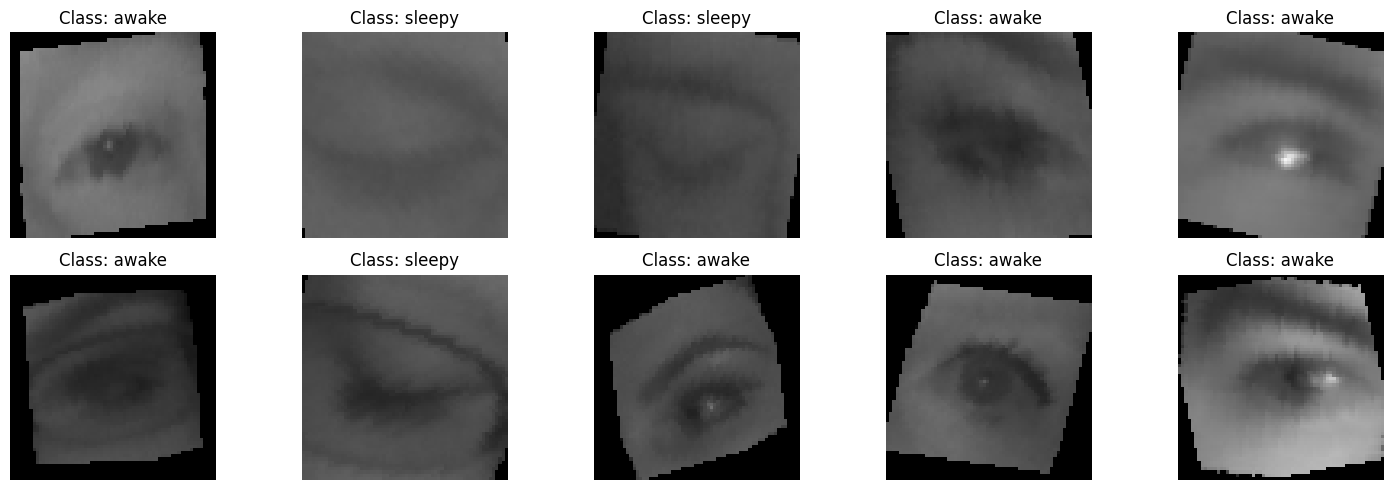

In [7]:
# Plot 10 sample images from the train set
def plot_samples(data_loader, classes, num_samples=10):
    data_iter = iter(data_loader)
    images, labels = next(data_iter)  # Fetch the first batch
    images = images[:num_samples]  # Select the first 'num_samples' images
    labels = labels[:num_samples]
    
    # Undo normalization for visualization
    images = images * 0.5 + 0.5  # De-normalize (mean=0.5, std=0.5)

    # Plot the images
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)  # Create a grid of 2 rows and 5 columns
        plt.imshow(np.transpose(images[i].numpy(), (1, 2, 0)))  # Convert tensor to HWC format
        plt.title(f"Class: {classes[labels[i]]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Call the function to plot samples
plot_samples(train_loader, train_dataset.classes)


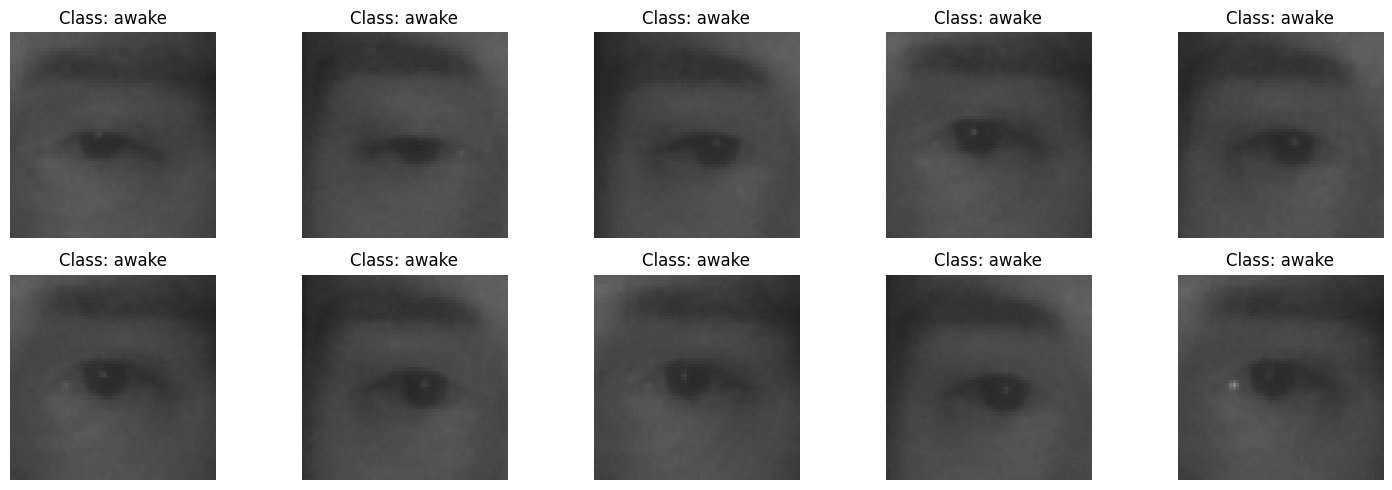

In [8]:
# Plot 10 sample images from the validation set
def plot_val_samples(data_loader, classes, num_samples=10):
    data_iter = iter(data_loader)
    images, labels = next(data_iter)  # Fetch the first batch
    images = images[:num_samples]  # Select the first 'num_samples' images
    labels = labels[:num_samples]
    
    # Undo normalization for visualization
    images = images * 0.5 + 0.5  # De-normalize (mean=0.5, std=0.5)

    # Plot the images
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)  # Create a grid of 2 rows and 5 columns
        plt.imshow(np.transpose(images[i].numpy(), (1, 2, 0)))  # Convert tensor to HWC format
        plt.title(f"Class: {classes[labels[i]]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Call the function to plot samples
plot_val_samples(val_loader, val_dataset.classes)


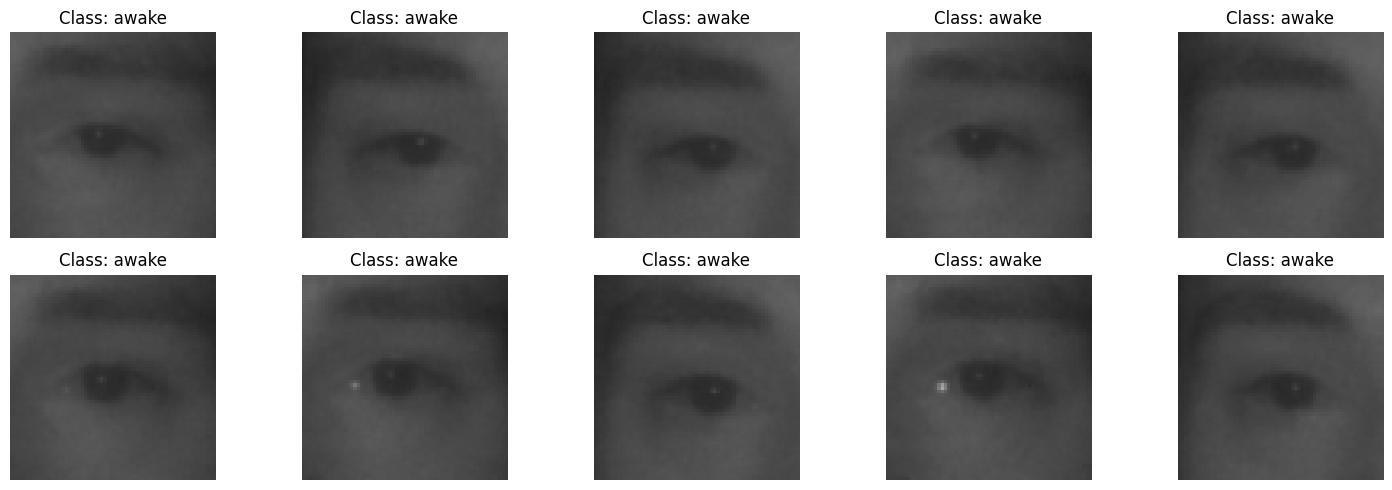

In [9]:
# Plot 10 sample images from the test set
def plot_test_samples(data_loader, classes, num_samples=10):
    data_iter = iter(data_loader)
    images, labels = next(data_iter)  # Fetch the first batch
    images = images[:num_samples]  # Select the first 'num_samples' images
    labels = labels[:num_samples]
    
    # Undo normalization for visualization
    images = images * 0.5 + 0.5  # De-normalize (mean=0.5, std=0.5)

    # Plot the images
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)  # Create a grid of 2 rows and 5 columns
        plt.imshow(np.transpose(images[i].numpy(), (1, 2, 0)))  # Convert tensor to HWC format
        plt.title(f"Class: {classes[labels[i]]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Call the function to plot samples
plot_test_samples(test_loader, test_dataset.classes)


In [10]:
# Check image dimensions from a data loader
def check_image_dimensions(data_loader):
    data_iter = iter(data_loader)
    images, labels = next(data_iter)  # Fetch the first batch
    print(f"Batch size: {images.size(0)}")
    print(f"Image dimensions: {images.size(1)} x {images.size(2)} x {images.size(3)}")
    print(f"Number of images in this batch: {len(images)}")
    print(f"Shape of the batch: {images.shape}")

# Check dimensions for each dataset
print("Train set:")
check_image_dimensions(train_loader)

print("\nValidation set:")
check_image_dimensions(val_loader)

print("\nTest set:")
check_image_dimensions(test_loader)


Train set:
Batch size: 32
Image dimensions: 3 x 64 x 64
Number of images in this batch: 32
Shape of the batch: torch.Size([32, 3, 64, 64])

Validation set:
Batch size: 32
Image dimensions: 3 x 64 x 64
Number of images in this batch: 32
Shape of the batch: torch.Size([32, 3, 64, 64])

Test set:
Batch size: 32
Image dimensions: 3 x 64 x 64
Number of images in this batch: 32
Shape of the batch: torch.Size([32, 3, 64, 64])


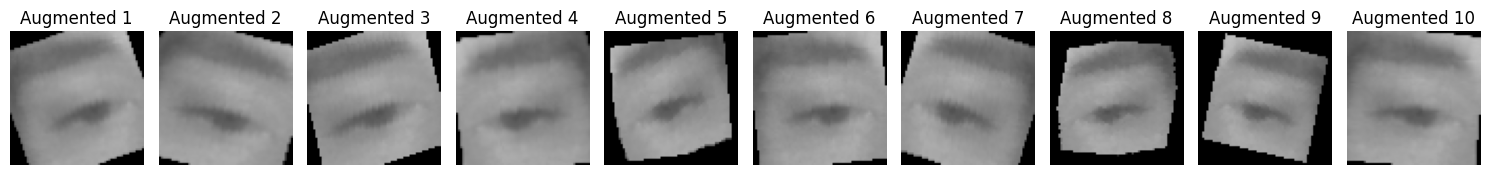

In [11]:
from PIL import Image

# Visualize data augmentation effects
def visualize_augmentation(dataset, num_samples=10):
    # Fetch a single image and label
    image, label = dataset[0]
    
    # Convert the image to a PIL Image
    if isinstance(image, torch.Tensor):
        image = F.to_pil_image(image)  # Convert tensor to PIL Image

    # Apply augmentations
    augmented_images = [train_transforms(image) for _ in range(num_samples)]  # Apply augmentations
    
    # Undo normalization for visualization
    augmented_images = [(img * 0.5 + 0.5) for img in augmented_images]  # De-normalize
    
    # Plot the augmented images
    plt.figure(figsize=(15, 5))
    for i, img in enumerate(augmented_images):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))  # Convert tensor to HWC format
        plt.title(f"Augmented {i + 1}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Call the function to visualize augmentations
visualize_augmentation(train_dataset)


In [12]:
class CNNModel(torch.nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv_layers = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, kernel_size=3),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
            torch.nn.Conv2d(32, 64, kernel_size=3),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
            torch.nn.Conv2d(64, 128, kernel_size=3),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2)
        )
        self.fc_layers = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(128 * 6 * 6, 512),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(512, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x


In [13]:
# Instantiate the model, optimizer, and criterion
model = CNNModel()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.BCELoss()


In [14]:
class EarlyStopping:
    def __init__(self, patience=10, verbose=False, path='best_model.pth'):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = np.inf
        self.early_stop = False
        self.path = path

    def __call__(self, val_loss, model):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
            torch.save(model.state_dict(), self.path)
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True


In [15]:
# Training Loop
def train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=25, early_stopping=None, resume=False):
    # Check if we are resuming training
    start_epoch = 0
    best_val_loss = np.inf
    if resume and os.path.exists('checkpoint.pth'):
        checkpoint = torch.load('checkpoint.pth')
        print("Checkpoint keys:", checkpoint.keys())  # Debugging: Ensure 'model_state_dict' is in the checkpoint
        if 'model_state_dict' in checkpoint:
            model.load_state_dict(checkpoint['model_state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
            start_epoch = checkpoint['epoch']
            best_val_loss = checkpoint['best_val_loss']
            print(f"Resuming training from epoch {start_epoch + 1}")
        else:
            print("Error: 'model_state_dict' not found in checkpoint. Starting fresh.")
    else:
        print("Training from scratch.")

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(start_epoch, num_epochs):
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0
        
        # Training phase
        for inputs, labels in train_loader:
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            
            # Backward pass
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()
            predicted = (outputs > 0.5).float()  # Binary classification
            correct_train += (predicted == labels.unsqueeze(1)).sum().item()
            total_train += labels.size(0)

        train_loss = running_train_loss / len(train_loader)
        train_accuracy = correct_train / total_train

        # Validation phase
        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels.unsqueeze(1).float())
                running_val_loss += loss.item()
                predicted = (outputs > 0.5).float()
                correct_val += (predicted == labels.unsqueeze(1)).sum().item()
                total_val += labels.size(0)

        val_loss = running_val_loss / len(val_loader)
        val_accuracy = correct_val / total_val

        # Print statistics for this epoch
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy*100:.2f}%, "
              f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy*100:.2f}%")

        # Save losses and accuracies
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        # Early stopping check
        if early_stopping:
            early_stopping(val_loss, model)
            if early_stopping.early_stop:
                print("Early stopping triggered")
                break

        # Save the best model based on validation loss
        if val_loss < best_val_loss:
            best_val_loss = val_loss

        # Save model checkpoint
        checkpoint = {
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'best_val_loss': best_val_loss,
        }
        torch.save(checkpoint, 'checkpoint.pth')

    # Return the lists for plotting
    return train_losses, val_losses, train_accuracies, val_accuracies


In [16]:
# Instantiate EarlyStopping class
early_stopping = EarlyStopping(patience=5, verbose=True)

# Train the model
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, optimizer, criterion, num_epochs=50, early_stopping=early_stopping, resume=True
)

Training from scratch.
Epoch [1/50], Train Loss: 0.2007, Train Accuracy: 92.06%, Validation Loss: 0.0848, Validation Accuracy: 96.89%
Epoch [2/50], Train Loss: 0.1081, Train Accuracy: 96.04%, Validation Loss: 0.0753, Validation Accuracy: 97.31%
Epoch [3/50], Train Loss: 0.0903, Train Accuracy: 96.73%, Validation Loss: 0.0592, Validation Accuracy: 97.93%
Epoch [4/50], Train Loss: 0.0822, Train Accuracy: 97.16%, Validation Loss: 0.0475, Validation Accuracy: 98.30%
Epoch [5/50], Train Loss: 0.0763, Train Accuracy: 97.34%, Validation Loss: 0.0447, Validation Accuracy: 98.43%
Epoch [6/50], Train Loss: 0.0715, Train Accuracy: 97.47%, Validation Loss: 0.0535, Validation Accuracy: 98.05%
Epoch [7/50], Train Loss: 0.0658, Train Accuracy: 97.66%, Validation Loss: 0.0373, Validation Accuracy: 98.73%
Epoch [8/50], Train Loss: 0.0622, Train Accuracy: 97.81%, Validation Loss: 0.0403, Validation Accuracy: 98.52%
Epoch [9/50], Train Loss: 0.0616, Train Accuracy: 97.84%, Validation Loss: 0.0367, Valida

In [17]:
# Function to plot results
def plot_training_results(train_losses, val_losses, train_accuracies, val_accuracies):
    # Plot loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label="Training Accuracy")
    plt.plot(val_accuracies, label="Validation Accuracy")
    plt.title('Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

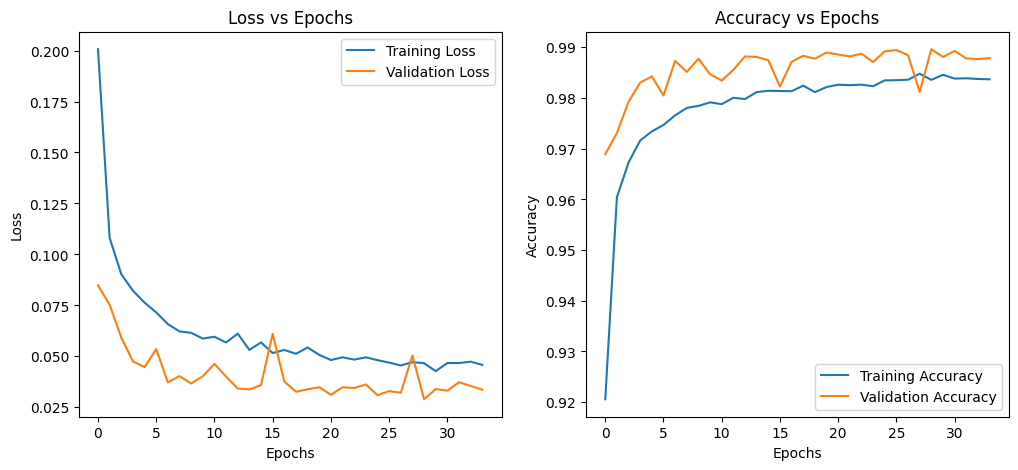

In [18]:
# Plot the results
plot_training_results(train_losses, val_losses, train_accuracies, val_accuracies)

In [19]:
# Load the best model (after early stopping)
model.load_state_dict(torch.load('best_model.pth'))

# Evaluation on the test dataset
model.eval()
running_test_loss = 0.0
correct_test = 0
total_test = 0

# For visualization
test_images, test_labels, test_preds = [], [], []

# Evaluate the model on the test dataset
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        
        running_test_loss += loss.item()
        
        # Make predictions
        predicted = (outputs > 0.5).float()
        correct_test += (predicted == labels.unsqueeze(1)).sum().item()
        total_test += labels.size(0)
        
        # Store images and predictions for visualization
        test_images.extend(inputs)
        test_labels.extend(labels)
        test_preds.extend(predicted)

# Calculate test loss and accuracy
test_loss = running_test_loss / len(test_loader)
test_accuracy = correct_test / total_test

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy*100:.2f}%")

<ipython-input-19-ce82d200db73>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


Test Loss: 0.0295, Test Accuracy: 98.96%


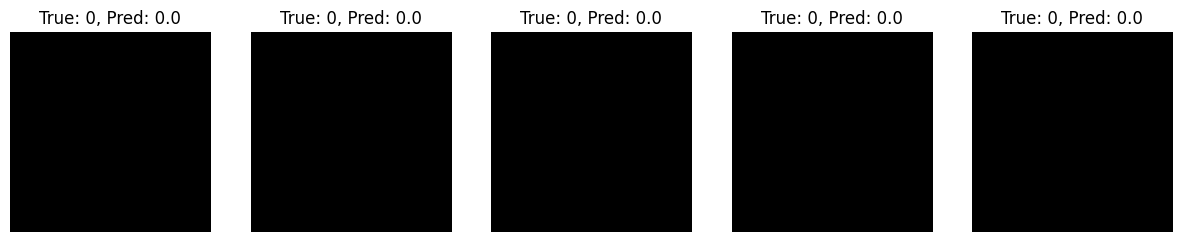

In [20]:
# Visualizing a few test predictions
def visualize_predictions(images, labels, preds, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i].permute(1, 2, 0))  # Convert from Tensor (C, H, W) to (H, W, C)
        ax.set_title(f"True: {labels[i].item()}, Pred: {preds[i].item()}")
        ax.axis('off')
    plt.show()

# Visualize the first 5 predictions
visualize_predictions(test_images[:5], test_labels[:5], test_preds[:5])


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import models

# Initialize model, loss, optimizer
num_classes = len(train_dataset.classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Using pre-trained DenseNet121 and modifying it for your number of classes
model = models.densenet121(pretrained=True)
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# EarlyStopping instance
early_stopping = EarlyStopping(patience=5, verbose=True)

# Track metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
  
# Check for checkpoint to resume training
start_epoch = 0
checkpoint_path = 'best_model.pth'

if os.path.exists(checkpoint_path):
    print("Resuming training from checkpoint...")
    checkpoint = torch.load(checkpoint_path)
    
    # Make sure the keys exist
    if 'model_state_dict' in checkpoint and 'optimizer_state_dict' in checkpoint:
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        start_epoch = checkpoint['epoch']
        train_losses = checkpoint['train_losses']
        val_losses = checkpoint['val_losses']
        train_accuracies = checkpoint['train_accuracies']
        val_accuracies = checkpoint['val_accuracies']
    else:
        print("Checkpoint missing required keys!")


# Training and validation loop
num_epochs = 50
for epoch in range(start_epoch, num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    # Training loss and accuracy
    train_loss = running_loss / len(train_loader)
    train_accuracy = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation phase
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    # Validation loss and accuracy
    val_loss_avg = val_loss / len(val_loader)
    val_accuracy = val_correct / val_total
    val_losses.append(val_loss_avg)
    val_accuracies.append(val_accuracy)

    # Print statistics
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
          f"Val Loss: {val_loss_avg:.4f}, Val Accuracy: {val_accuracy:.4f}")

    # Early stopping check
    early_stopping(val_loss_avg, model)
    if early_stopping.early_stop:
        print("Early stopping triggered!")
        break

    # Save checkpoint after every epoch
    torch.save({
        'epoch': epoch + 1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies
    }, checkpoint_path)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 139MB/s]


Resuming training from checkpoint...
Checkpoint missing required keys!


<ipython-input-21-b94282ff0874>:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


Epoch 1/50 | Train Loss: 0.0881, Train Accuracy: 0.9692, Val Loss: 0.0590, Val Accuracy: 0.9782
Epoch 2/50 | Train Loss: 0.0633, Train Accuracy: 0.9782, Val Loss: 0.0489, Val Accuracy: 0.9826
Epoch 3/50 | Train Loss: 0.0580, Train Accuracy: 0.9797, Val Loss: 0.0464, Val Accuracy: 0.9838
Epoch 4/50 | Train Loss: 0.0522, Train Accuracy: 0.9820, Val Loss: 0.0406, Val Accuracy: 0.9852
Epoch 5/50 | Train Loss: 0.0498, Train Accuracy: 0.9824, Val Loss: 0.0336, Val Accuracy: 0.9880
Epoch 6/50 | Train Loss: 0.0470, Train Accuracy: 0.9836, Val Loss: 0.0380, Val Accuracy: 0.9863
Epoch 7/50 | Train Loss: 0.0439, Train Accuracy: 0.9840, Val Loss: 0.0309, Val Accuracy: 0.9898
Epoch 8/50 | Train Loss: 0.0434, Train Accuracy: 0.9840, Val Loss: 0.0370, Val Accuracy: 0.9876
Epoch 9/50 | Train Loss: 0.0464, Train Accuracy: 0.9841, Val Loss: 0.0334, Val Accuracy: 0.9880
Epoch 10/50 | Train Loss: 0.0424, Train Accuracy: 0.9849, Val Loss: 0.0370, Val Accuracy: 0.9876
Epoch 11/50 | Train Loss: 0.0393, Train

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8591
           1       0.99      0.99      0.99      8390

    accuracy                           0.99     16981
   macro avg       0.99      0.99      0.99     16981
weighted avg       0.99      0.99      0.99     16981



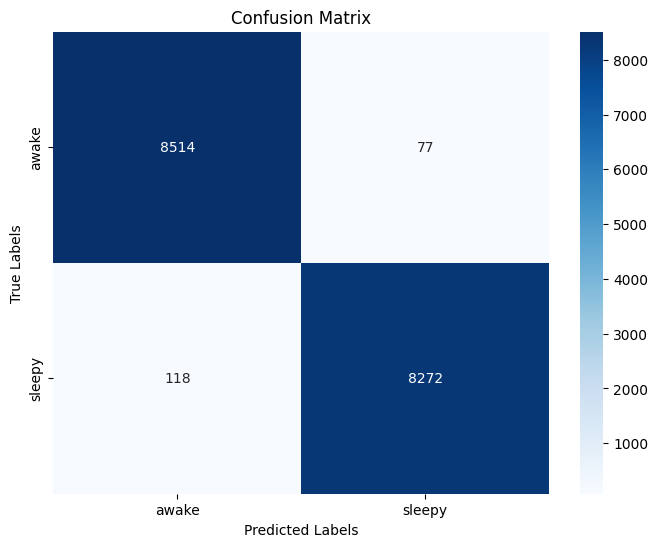


Precision per class: [0.98632994 0.99077734]
Recall per class: [0.99103713 0.98593564]
F1-Score per class: [0.98867793 0.98835056]
Support per class: [8591 8390]


In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Set model to evaluation mode
model.eval()

# Variables to store the true labels and predictions
all_labels = []
all_preds = []

# No need to track gradients for validation
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        
        # Get the predicted labels
        _, predicted = torch.max(outputs, 1)
        
        # Store labels and predictions
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Precision, Recall, F1-Score, and Support
precision = precision_score(all_labels, all_preds, average=None)  # Per-class precision
recall = recall_score(all_labels, all_preds, average=None)  # Per-class recall
f1 = f1_score(all_labels, all_preds, average=None)  # Per-class F1 score
support = np.bincount(all_labels)  # Support (number of true instances per class)

# Print classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds))

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the individual metrics
print("\nPrecision per class:", precision)
print("Recall per class:", recall)
print("F1-Score per class:", f1)
print("Support per class:", support)


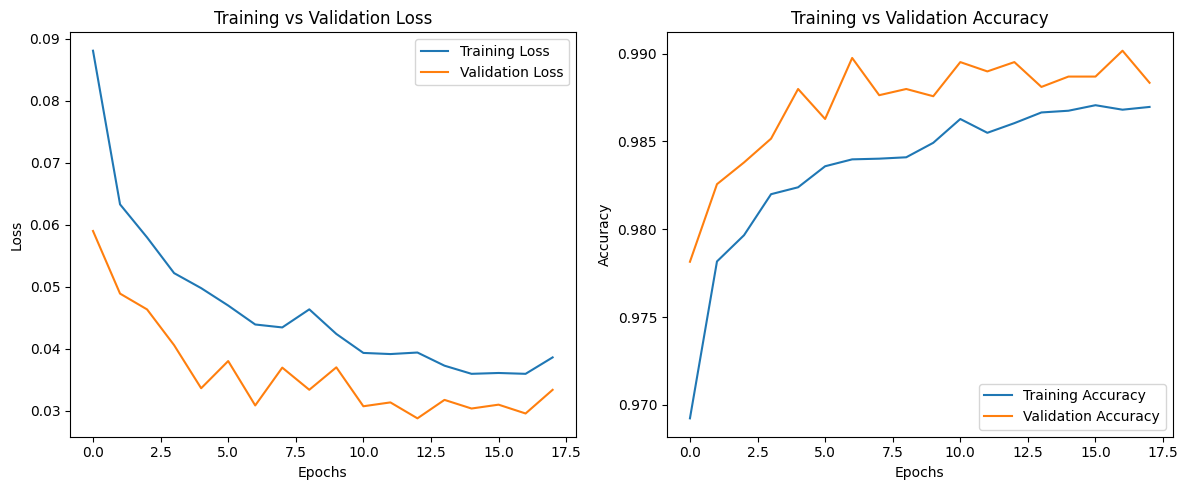

In [23]:
import matplotlib.pyplot as plt

# Plot the training and validation losses/accuracies
plt.figure(figsize=(12, 5))

# Training vs Validation Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8591
           1       0.99      0.99      0.99      8390

    accuracy                           0.99     16981
   macro avg       0.99      0.99      0.99     16981
weighted avg       0.99      0.99      0.99     16981


Precision per class: [0.98632994 0.99077734]
Recall per class: [0.99103713 0.98593564]
F1-Score per class: [0.98867793 0.98835056]
Support per class: [8591 8390]
Test Loss: 0.0332
Test Accuracy: 98.85%


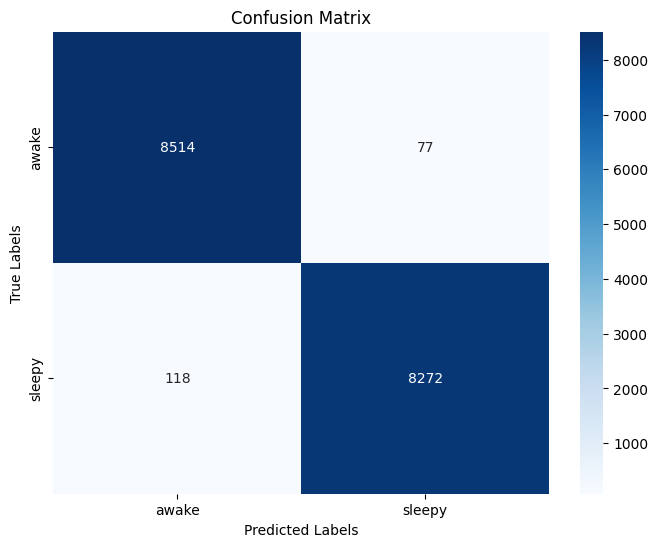

In [24]:
import torch
import torch.nn.functional as F
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Set model to evaluation mode
model.eval()

# Initialize variables to track the total loss and correct predictions
test_loss = 0
correct = 0
total = 0

# Variables to store the true labels and predictions for metrics calculation
all_labels = []
all_preds = []

# No need to track gradients for validation
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        
        # Calculate the loss
        loss = F.cross_entropy(outputs, labels)
        test_loss += loss.item()  # Add the current batch's loss to total loss
        
        # Get predicted labels
        _, predicted = torch.max(outputs, 1)
        
        # Store labels and predictions
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())
        
        # Calculate number of correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Compute the average test loss and test accuracy
average_test_loss = test_loss / len(test_loader)
test_accuracy = 100 * correct / total

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Precision, Recall, F1-Score, and Support
precision = precision_score(all_labels, all_preds, average=None)  # Per-class precision
recall = recall_score(all_labels, all_preds, average=None)  # Per-class recall
f1 = f1_score(all_labels, all_preds, average=None)  # Per-class F1 score
support = np.bincount(all_labels)  # Support (number of true instances per class)

# Print classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds))

# Print the individual metrics
print("\nPrecision per class:", precision)
print("Recall per class:", recall)
print("F1-Score per class:", f1)
print("Support per class:", support)

# Print Test Loss and Accuracy
print(f'Test Loss: {average_test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.2f}%')

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
